Deliverables

Feature Selection Report



Correlation Analysis:

A heatmap or table summarizing feature correlations, highlighting highly correlated features and their implications for redundancy or multicollinearity.

Feature Importance Analysis:

A ranked list of features based on importance scores derived from techniques such as tree-based models, mutual information, or statistical tests.

Identification of irrelevant or less impactful features for potential removal.

Feature Engineering Summary



New Features Created:

A list and description of newly created features, explaining their relevance to the business problem.

Examples include the length of the URL, number of special characters, or domain age for phishing detection.

Impact of New Features:

Preliminary analysis (e.g., correlation with the target variable or basic EDA) showing the potential contribution of the new features.

Refined Dataset



A refined dataset with selected features and engineered features added.

Documentation of the feature selection process and rationale for keeping or discarding specific features.

Insights and Recommendations



Key findings from the feature selection process, such as features strongly correlated with the target variable or new features with high predictive potential.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df=pd.read_csv("dataset_phishing.csv")
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [33]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

correlation matrix:
                 length_url  length_hostname        ip   nb_dots  nb_hyphens  \
length_url         1.000000         0.223025  0.453961  0.443589    0.399564   
length_hostname    0.223025         1.000000  0.252013  0.408956    0.057702   
ip                 0.453961         0.252013  1.000000  0.288398    0.109860   
nb_dots            0.443589         0.408956  0.288398  1.000000    0.045099   
nb_hyphens         0.399564         0.057702  0.109860  0.045099    1.000000   
...                     ...              ...       ...       ...         ...   
web_traffic        0.072205         0.163238  0.167930  0.087969   -0.041464   
dns_record         0.023357        -0.023344  0.127823  0.126659   -0.031477   
google_index       0.236395         0.213990  0.270743  0.209616   -0.018828   
page_rank         -0.102582        -0.159342 -0.218968 -0.097312    0.104341   
status_encoded     0.248580         0.238322  0.321698  0.207029   -0.100107   

                   

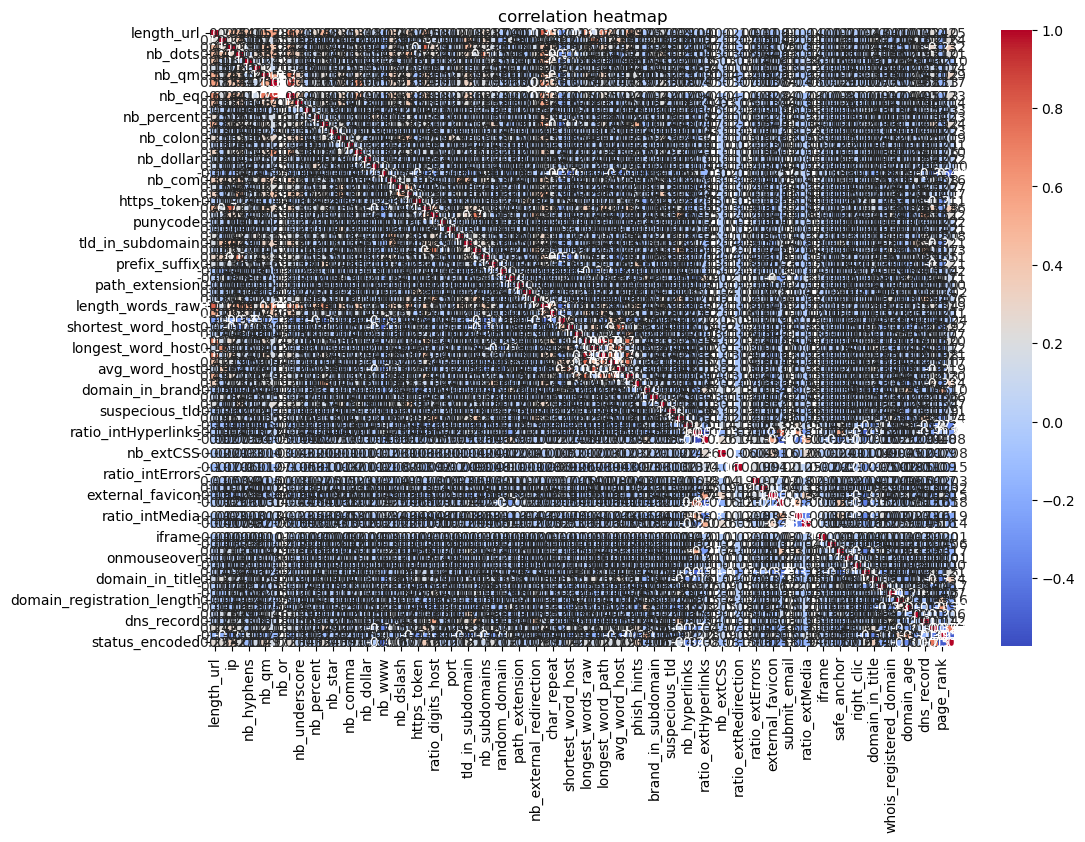

In [55]:
numeric_df=df.select_dtypes(include=["number"])

correlation_matrix=numeric_df.corr()
print("correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",cbar=True)
plt.title("correlation heatmap")
plt.show()

In [57]:
# Top 10 correlation
# Compute the top 10 correlations
top_10 = (
    correlation_matrix.unstack()
    .drop_duplicates()  # Remove duplicate pairs
    .abs()  # Take absolute values
    .sort_values(ascending=False)  # Sort by strength
    .head(10)  # Select top 10
)

print("Top 10 Correlations:")
print(top_10)


Top 10 Correlations:
length_url           length_url           1.000000
longest_words_raw    longest_word_path    0.968503
nb_and               nb_eq                0.906404
longest_word_host    avg_word_host        0.816313
shortest_word_host   avg_word_host        0.800014
ratio_intHyperlinks  links_in_tags        0.799374
length_url           length_words_raw     0.794710
longest_word_path    avg_word_path        0.791198
longest_words_raw    avg_words_raw        0.784753
ip                   ratio_digits_url     0.768906
dtype: float64


In [89]:
# Feature engineering for URLs (replace 'url_column' with the actual URL column name)
df['url_length'] = df['url'].apply(len)  # Length of the URL
df['num_special_chars'] = df['url'].str.count(r'[^a-zA-Z0-9]')  # Count special characters
df['num_subdomains'] = df['url'].str.count(r'\.')  # Count subdomains

# Drop the original URL column
df = df.drop(columns=['url'])

# Check the new features
print("Feature Engineered Data:")
print(df[['url_length', 'num_special_chars', 'num_subdomains']].head())


Feature Engineered Data:
   url_length  num_special_chars  num_subdomains
0          37                  7               3
1          77                  7               1
2         126                 19               4
3          18                  5               2
4          55                 10               2


In [91]:
# Automatically encode categorical columns
from sklearn.preprocessing import LabelEncoder

# Encode any remaining non-numeric columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

print("Data After Encoding:")
print(df.head())


Data After Encoding:
   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19   0        3           0      0      0       0   
1          77               23   1        1           0      0      0       0   
2         126               50   1        4           1      0      1       2   
3          18               11   0        2           0      0      0       0   
4          55               15   0        2           2      0      0       0   

   nb_or  nb_eq  ...  domain_age  web_traffic  dns_record  google_index  \
0      0      0  ...          -1            0           1             1   
1      0      0  ...        5767            0           0             1   
2      0      3  ...        4004      5828815           0             1   
3      0      0  ...          -1       107721           0             0   
4      0      0  ...        8175         8725           0             0   

   page_rank  status  status_encoded  url

In [96]:
from sklearn.model_selection import train_test_split

# Define features and target (replace 'target_column' with the actual target column name)
X = df.drop(columns=['status'])
y = df["status"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (8001, 91)
Testing Data Shape: (3429, 91)


In [100]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Check the feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importances)


Feature Importances:
                 Feature  Importance
87        status_encoded    0.385812
85          google_index    0.096187
56         nb_hyperlinks    0.077978
86             page_rank    0.055970
83           web_traffic    0.052873
..                   ...         ...
61  ratio_intRedirection    0.000000
71                   sfh    0.000000
68          submit_email    0.000000
59  ratio_nullHyperlinks    0.000000
18             nb_dollar    0.000000

[91 rows x 2 columns]


In [102]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1732
           1       1.00      1.00      1.00      1697

    accuracy                           1.00      3429
   macro avg       1.00      1.00      1.00      3429
weighted avg       1.00      1.00      1.00      3429

